In [1]:
import pandas as pd
import numpy as np

In [9]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts.head()
ts.tail()
" 각 로우의 인덱스에서 년도를 추출하여 Group by 후에 각 로우를 년도별 평균, 표준편차로 나눈다."
transformed = (ts.groupby(lambda x: x.year)
                 .transform(lambda x: (x - x.mean()) / x.std()))
transformed

2000-01-08   -0.037471
2000-01-09   -0.150632
2000-01-10   -0.296308
2000-01-11   -0.278556
2000-01-12   -0.466738
                ...   
2002-09-30   -0.095305
2002-10-01   -0.156074
2002-10-02   -0.563074
2002-10-03   -0.510999
2002-10-04   -0.299418
Freq: D, Length: 1001, dtype: float64

In [11]:
ts.index[0].year

2000

In [14]:
grouped = ts.groupby(lambda x: x.year)

In [18]:
print(f"{grouped.mean()}  \n {grouped.std()} \n {grouped.var()}")

2000    0.580005
2001    0.469291
2002    0.478146
dtype: float64  
 2000    0.142438
2001    0.156933
2002    0.222321
dtype: float64 
 2000    0.020289
2001    0.024628
2002    0.049427
dtype: float64


In [20]:
grouped_trans = transformed.groupby(lambda x: x.year)
print(f"{grouped_trans.mean()}  \n {grouped_trans.std()} \n {grouped_trans.var()}")

2000    2.019431e-16
2001    4.106304e-16
2002    3.086180e-17
dtype: float64  
 2000    1.0
2001    1.0
2002    1.0
dtype: float64 
 2000    1.0
2001    1.0
2002    1.0
dtype: float64


<AxesSubplot:>

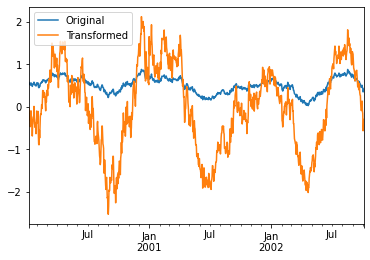

In [21]:
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.plot()

In [23]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10, 'B': np.arange(20)})
df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [24]:
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [26]:
" accumulate "
df_re.groupby('A').expanding().sum() 

A      B
A                
1 0    1.0    0.0
  1    2.0    1.0
  2    3.0    3.0
  3    4.0    6.0
  4    5.0   10.0
  5    6.0   15.0
  6    7.0   21.0
  7    8.0   28.0
  8    9.0   36.0
  9   10.0   45.0
5 10   5.0   10.0
  11  10.0   21.0
  12  15.0   33.0
  13  20.0   46.0
  14  25.0   60.0
  15  30.0   75.0
  16  35.0   91.0
  17  40.0  108.0
  18  45.0  126.0
  19  50.0  145.0

In [28]:
df_re = pd.DataFrame(
    {
        'date': pd.date_range(start='2016-01-01', periods=4,freq='W'),
        'group': [1, 1, 2, 2],
        'val': [5, 6, 7, 8]
    }
).set_index('date')
df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [34]:
df_re.groupby('group').resample('1D').sum()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      0    0
      2016-01-05      0    0
      2016-01-06      0    0
      2016-01-07      0    0
      2016-01-08      0    0
      2016-01-09      0    0
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      0    0
      2016-01-19      0    0
      2016-01-20      0    0
      2016-01-21      0    0
      2016-01-22      0    0
      2016-01-23      0    0
      2016-01-24      2    8

In [35]:
df_re.groupby('group').resample('2D').sum()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-05      0    0
      2016-01-07      0    0
      2016-01-09      1    6
2     2016-01-17      2    7
      2016-01-19      0    0
      2016-01-21      0    0
      2016-01-23      2    8

In [36]:
df_re.groupby('group').resample('1D').ffill()

group  val
group date                  
1     2016-01-03      1    5
      2016-01-04      1    5
      2016-01-05      1    5
      2016-01-06      1    5
      2016-01-07      1    5
      2016-01-08      1    5
      2016-01-09      1    5
      2016-01-10      1    6
2     2016-01-17      2    7
      2016-01-18      2    7
      2016-01-19      2    7
      2016-01-20      2    7
      2016-01-21      2    7
      2016-01-22      2    7
      2016-01-23      2    7
      2016-01-24      2    8